<h1><b>인공지능개론 5주차 과제(MNIST DL)</b></h1>
<p>컴퓨터공학과 202136038 조성준</p>


---

<h2><b>1. 데이터 로딩</b></h2>

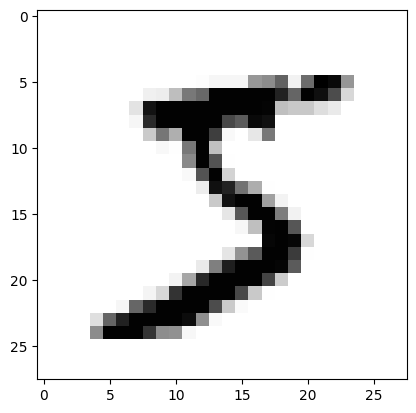

In [34]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

plt.imshow(X_train[0], cmap="Greys")

<h2><b>2. 데이터 전처리 </b></h2>

In [35]:
# 1. 데이터 불러오기
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# 2. 정규화 (픽셀값: 0~255 → 0~1)
X_train = X_train / 255.0
X_test = X_test / 255.0

# 3. 확인
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (60000, 28, 28)
X_test shape: (10000, 28, 28)
y_train shape: (60000,)
y_test shape: (10000,)


<h2><b>3. 모델 구축 & 컴파일</b></h2>

In [36]:
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))  # 이미지 평탄화
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))  # 10개 클래스

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',  # 정수 라벨용
    metrics=['accuracy']
)


<h2><b>4. 학습시키기 </b></h2>

In [37]:
history = model.fit(
    X_train, y_train,
    epochs=5,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8642 - loss: 0.4565 - val_accuracy: 0.9613 - val_loss: 0.1354
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9652 - loss: 0.1151 - val_accuracy: 0.9665 - val_loss: 0.1049
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9775 - loss: 0.0765 - val_accuracy: 0.9714 - val_loss: 0.0969
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9833 - loss: 0.0545 - val_accuracy: 0.9699 - val_loss: 0.1014
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9865 - loss: 0.0424 - val_accuracy: 0.9742 - val_loss: 0.0889


<h2><b>5. 학습곡선 시각화 </b></h2>

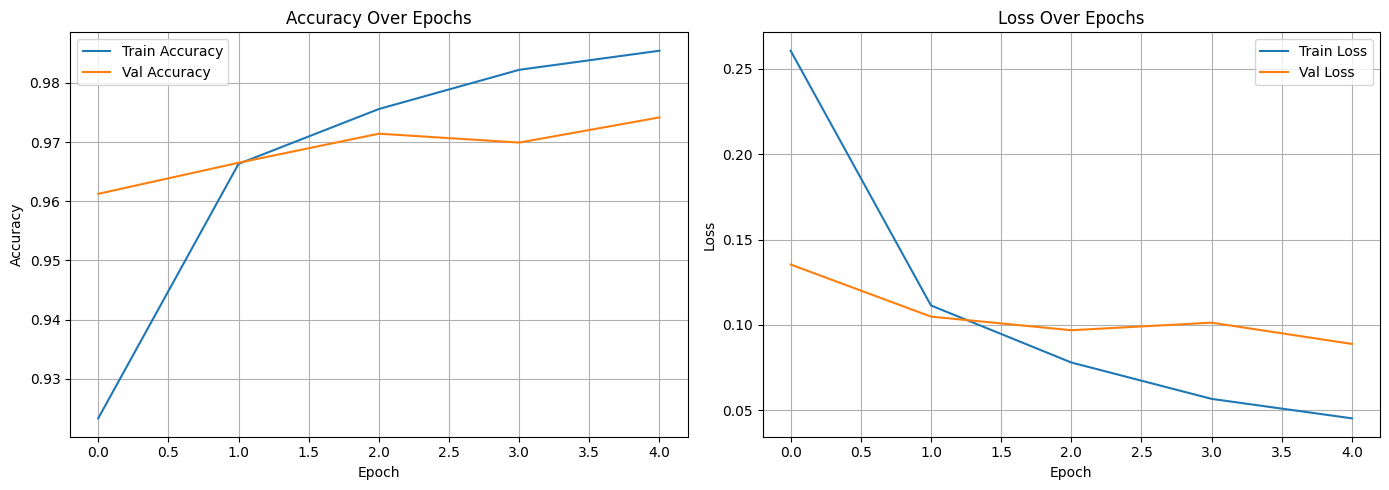

In [38]:
# 정확도 & 손실 그래프
plt.figure(figsize=(14, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


<h2><b>5. 혼동행렬 & 리포트</b></h2>

In [40]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

y_pred = model.predict(x_test)
y_pred_labels = np.argmax(y_pred, axis=1)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_labels))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_labels))


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Confusion Matrix:
[[ 972    0    1    2    0    0    3    1    1    0]
 [   0 1133    2    0    0    0    0    0    0    0]
 [   6    6 1004    4    1    1    1    5    4    0]
 [   1    2    4  982    0    9    0    5    3    4]
 [   3    2    2    0  946    0    6    2    1   20]
 [   3    2    0    7    1  870    3    1    4    1]
 [   9    5    0    1    2    6  935    0    0    0]
 [   0    6   11    1    0    0    0 1000    2    8]
 [   7    2    7    8    6    6    0    4  932    2]
 [   2    3    1    6    2    2    0    5    0  988]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.98      1.00      0.99      1135
           2       0.97      0.97      0.97      1032
           3       0.97      0.97      0.97      1010
           4       0.99      0.96      0.98       982
           5       0.97      0.98      0.97       892
       

<h2><b>6. 예측결과 시각화</b></h2>

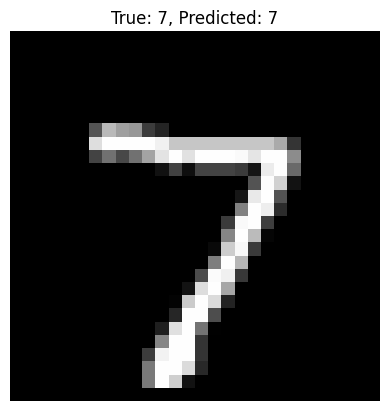

In [41]:
plt.imshow(x_test[0], cmap="gray")
plt.title(f"True: {y_test[0]}, Predicted: {y_pred_labels[0]}")
plt.axis('off')
plt.show()
